In [1]:

import numpy as np
import pandas as pd

# For plotting maps
import folium

# For Regular Expressions
import re

# For working with geographical data
import geopandas

# For plotting in python
import matplotlib
import matplotlib.pyplot as plt

C:\Users\AIMAN\anaconda3\lib\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\AIMAN\AppData\Local\Temp\ipykernel_7672\2141062306.py:11: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you a

In [2]:
df_covid=pd.read_csv('complete.csv')
df_covid.head()

Date Name of State / UT  Latitude  Longitude  Total Confirmed cases  \
0  2020-01-30             Kerala   10.8505    76.2711                    1.0   
1  2020-01-31             Kerala   10.8505    76.2711                    1.0   
2  2020-02-01             Kerala   10.8505    76.2711                    2.0   
3  2020-02-02             Kerala   10.8505    76.2711                    3.0   
4  2020-02-03             Kerala   10.8505    76.2711                    3.0   

  Death  Cured/Discharged/Migrated  New cases  New deaths  New recovered  
0     0                        0.0          0           0              0  
1     0                        0.0          0           0              0  
2     0                        0.0          1           0              0  
3     0                        0.0          1           0              0  
4     0                        0.0          0           0              0

In [3]:
india_geojson=geopandas.read_file('india.json')
india_geojson.head()

id   district dt_code    st_nm st_code    year  \
0 NaN     Aizawl     261  Mizoram      15  2011_c   
1 NaN   Champhai     262  Mizoram      15  2011_c   
2 NaN    Kolasib     263  Mizoram      15  2011_c   
3 NaN  Lawngtlai     264  Mizoram      15  2011_c   
4 NaN    Lunglei     265  Mizoram      15  2011_c   

                                            geometry  
0  POLYGON ((93.04466 23.41052, 92.94680 23.51363...  
1  MULTIPOLYGON (((93.04619 23.66623, 93.04466 23...  
2  POLYGON ((92.89633 24.39072, 92.86116 24.31374...  
3  POLYGON ((92.93456 22.55405, 92.93150 22.39458...  
4  POLYGON ((92.67307 23.38303, 92.68989 23.32804...

<AxesSubplot:>

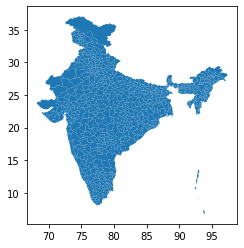

In [4]:
india_geojson.plot()


In [5]:
df_covid.isnull().sum()
# df_covid.dtypes

Date                         0
Name of State / UT           0
Latitude                     0
Longitude                    0
Total Confirmed cases        0
Death                        0
Cured/Discharged/Migrated    0
New cases                    0
New deaths                   0
New recovered                0
dtype: int64

# Test for the pushpins

In [6]:
import folium
m=folium.Map(location=[28.644800, 77.216721])
m

In [7]:
from branca.element import Figure
fig=Figure(width=550,height=350)

In [8]:
m1=folium.Map(width=550,height=350,location=[28.644800, 77.216721],zoom_start=11,min_zoom=8,max_zoom=14)
fig.add_child(m1)
m1

In [9]:
fig2=Figure(width=550,height=350)
m2=folium.Map(location=[28.644800, 77.216721])
fig2.add_child(m2)
folium.TileLayer('Stamen Terrain').add_to(m2)
folium.TileLayer('Stamen Toner').add_to(m2)
folium.TileLayer('Stamen Water Color').add_to(m2)
folium.TileLayer('cartodbpositron').add_to(m2)
folium.TileLayer('cartodbdark_matter').add_to(m2)
folium.LayerControl().add_to(m2)
m2

In [10]:
# Creating Basemap
fig3=Figure(width=550,height=350)
m3=folium.Map(location=[28.644800, 77.216721],tiles='cartodbpositron',zoom_start=11)
fig3.add_child(m3)

#Adding markers to the map
folium.Marker(location=[28.695800, 77.244721],popup='Company Name',tooltip='Click here to see Popup').add_to(m3)
folium.Marker(location=[28.645800, 77.214721],popup='<strong>Marker3</strong>',tooltip='<strong>Click here to see Popup</strong>').add_to(m3)
folium.Marker(location=[28.655800, 77.274721],popup='<h3 style="color:green;">Marker2</h3>',tooltip='<strong>Click here to see Popup</strong>').add_to(m3)

m3


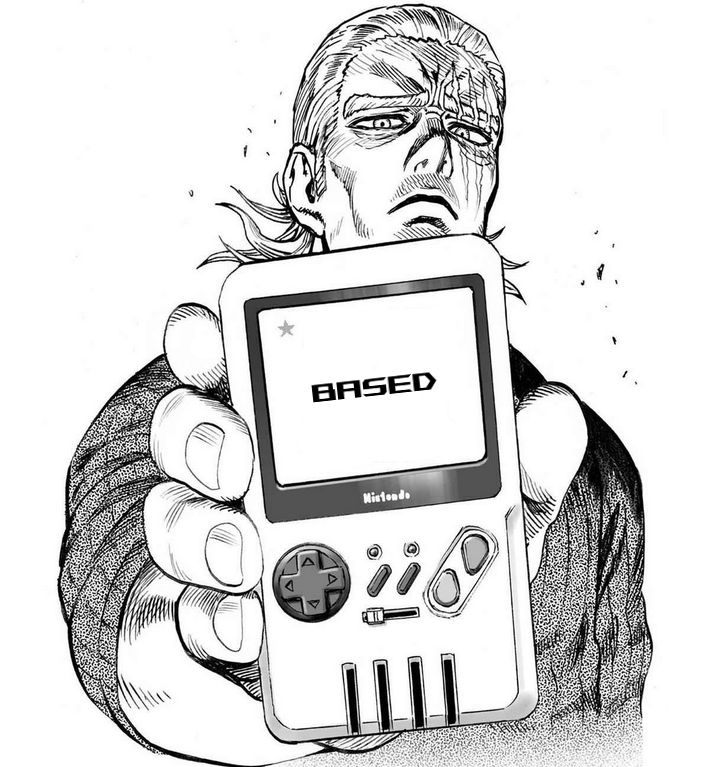

In [11]:
# Creating Basemap
fig4=Figure(height=350,width=550)
m4=folium.Map(location=[28.4911091,77.0867361],tiles='cartodbpositron',zoom_start=11)
fig4.add_child(m4)

# Adding Custom Markers
folium.Marker(location=[28.4211091,77.0267361],popup='Custom Marker 1',tooltip='<strong>Click here to see Popup</strong>',icon=folium.Icon(color='red',icon='none')).add_to(m4)
folium.Marker(location=[28.4411091,77.1167361],popup='Custom Marker 2',tooltip='<strong>Click here to see Popup</strong>',icon=folium.Icon(color='green',prefix='glyphicon',icon='off')).add_to(m4)
folium.Marker(location=[28.4511091,77.1667361],popup='Custom Marker 3',tooltip='<strong>Click here to see Popup</strong>',icon=folium.Icon(color='purple',prefix='fa',icon='anchor')).add_to(m4)
folium.Marker(location=[28.4911091,77.0867361],popup='Custom Marker 4- <b>Analytics Vidhya</b>',tooltip='<strong>Click here to see Popup</strong>',icon=folium.features.CustomIcon('1692850113524126.png',icon_size=(50,50))).add_to(m4)

m4

In [12]:
#company name, address
#possibly: website

#tooltip is company name
#the rest is rn, address and website

In [13]:
#14
#selangor and perlis just one person

#12
#bahagi 4

